<center>
<img src="http://www.bigdive.eu/wp-content/uploads/2012/05/logoBIGDIVE-01.png">
</center>

---

# Classification Models

## André Panisson

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Classification datset

In the following, we generated 50 samples from a bivariate Gaussian distribution $\mathcal{ N } ((2, 0)^T , I)$ and labeled this class
**RED**. Similarly, 50 more were drawn from $\mathcal{N} ((0, 2)^T , I)$ and labeled class **GREEN**.

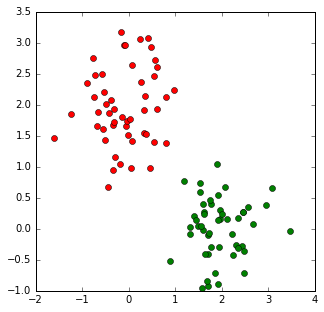

In [2]:
np.random.seed(3)
nr_samples = 100

# Generate 100 samples from two bivariate Gaussian distributions
samples_red   = np.random.multivariate_normal(mean=(0,2), cov=np.identity(2)*0.3, size=nr_samples/2)
samples_green = np.random.multivariate_normal(mean=(2,0), cov=np.identity(2)*0.3, size=nr_samples/2)

# Join the red and green datasets as X and the class definitions as y
X = np.concatenate([samples_red, samples_green])
y = np.zeros(nr_samples, dtype=int)
y[nr_samples/2:] = 1

# plot the red and green class points
figure(num=None, figsize=(5, 5))
plot(samples_red[:,0], samples_red[:,1], 'ro')
plot(samples_green[:,0], samples_green[:,1], 'go');

In [3]:
# create a colormap for the points
from matplotlib.colors import ListedColormap
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

def plot_decision_boundary(model, X, plot_hyperplanes=False, plot_boundary=False):
    """
    Plots the decision boundary of a classifier.
    """
    
    # create a mesh of points that cover the full graph area
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = .02  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    X_grid = np.c_[xx.ravel(), yy.ravel()]

    # use the classifier to predict the class of each mesh point
    try:
        Z = model.decision_function(X_grid)
    except:
        Z = model.predict_proba(X_grid)[:,1]-0.5
    Z = Z.reshape(xx.shape)

    figure(figsize=(8, 6))

    # plot the decision boundary
    norm = plt.cm.colors.Normalize(vmax=abs(Z).max(), vmin=-abs(Z).max())
    contourf(xx, yy, Z, 100, cmap=plt.cm.RdBu, alpha=.8, norm=norm)
    xlim(x_min, x_max)
    ylim(y_min, y_max)
    
    if plot_boundary:
        # plot the decision hyper-planes
        contour(xx, yy, Z, colors=['k'],
                linestyles=['-'],
                levels=[0])
    
    if plot_hyperplanes:
        # plot the decision hyper-planes
        contour(xx, yy, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'],
                levels=[-1., 0, 1.])

## Perceptron

The `Perceptron` is a simple algorithm suitable for large scale learning.

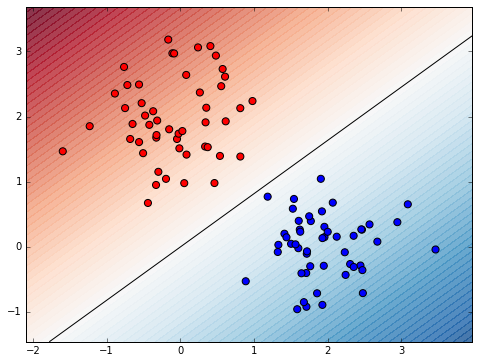

In [4]:
from sklearn import linear_model

model = linear_model.Perceptron() # l'opzione penalty equivale alla regolarizzazione
model.fit(X, y)

plot_decision_boundary(model, X, plot_boundary=True)
# plot the dataset points
scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, s=50)

bets alpha: 0.00784759970351


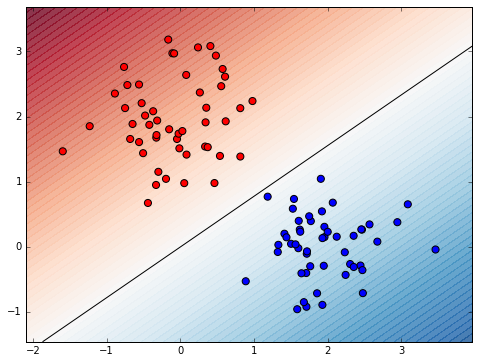

In [15]:
#ESERCIZIO --> ripetere la stima precedente, utilizzando penalty per inserire una regolarizzazione (l1 / l2)

from sklearn import linear_model, metrics, cross_validation

model = linear_model.Perceptron(penalty = 'l2') # l'opzione penalty equivale alla regolarizzazione

alphas = np.logspace(-4, 0, 20) 

test_scores = []
acc=metrics.accuracy_score

for alpha in alphas:
    model = linear_model.Perceptron(penalty='l2', alpha=alpha)
    scores = cross_validation.cross_val_score(model, X, y, cv=20)
    test_scores.append(np.mean(scores))

alpha = alphas[np.argmax(test_scores)]
print "bets alpha:", alpha

model = linear_model.Perceptron(penalty = 'l2', alpha = alpha)
model.fit(X, y)

plot_decision_boundary(model, X, plot_boundary=True)
# plot the dataset points
scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, s=50)

In [11]:
test_scores

[0.98750000000000004,
 0.98750000000000004,
 0.98750000000000004,
 0.98750000000000004,
 0.98750000000000004,
 0.98750000000000004,
 0.97916666666666674,
 0.97916666666666674,
 0.99166666666666681,
 1.0,
 0.98333333333333339,
 0.99166666666666681,
 1.0,
 0.99166666666666681,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.60833333333333328]

In [14]:
model.intercept_

array([ 0.])

best alpha 0.00784759970351 {'alpha': 0.0011288378916846883}


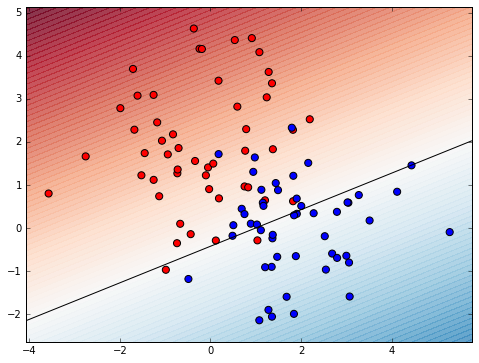

In [24]:
# Equivalente dell'esercizio precedente con gridsearch e covarianza aumentata


##############################################

np.random.seed(3)
nr_samples = 100

# Generate 100 samples from two bivariate Gaussian distributions
samples_red   = np.random.multivariate_normal(mean=(0,2), cov=np.identity(2)*1.5, size=nr_samples/2)
samples_green = np.random.multivariate_normal(mean=(2,0), cov=np.identity(2)*1.5, size=nr_samples/2)

# Join the red and green datasets as X and the class definitions as y
X = np.concatenate([samples_red, samples_green])
y = np.zeros(nr_samples, dtype=int)
y[nr_samples/2:] = 1

##############################################


from sklearn import grid_search

model = linear_model.Perceptron(penalty = 'l2')

alphas = np.logspace(-4, 0, 20) 
gs = grid_search.GridSearchCV(model, {'alpha':alphas}, cv = 10)
gs.fit (X,y)

print "best alpha", alpha, gs.best_params_

plot_decision_boundary(gs, X, plot_boundary=True)
# plot the dataset points
scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, s=50)

## Logistic regression

Logistic regression, despite its name, is a linear model for classification
rather than regression. Logistic regression is also known in the literature as
logit regression, maximum-entropy classification (MaxEnt)
or the log-linear classifier. In this model, the probabilities describing the possible outcomes of a single trial are modeled using a [logistic function](http://en.wikipedia.org/wiki/Logistic_function>).

best C {'C': 0.033598182862837812}


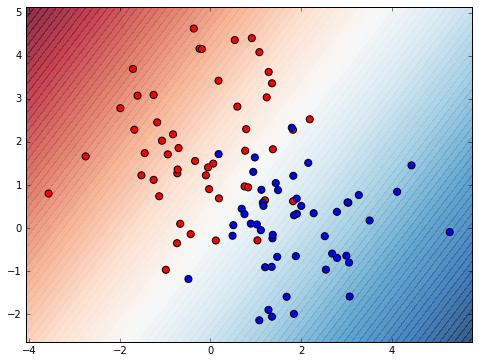

In [34]:
from sklearn import linear_model

model = linear_model.LogisticRegression(penalty='l1')

C = np.logspace(-4, 0, 20)
gs = grid_search.GridSearchCV(model, {'C':C}, cv = 10)
gs.fit (X,y)

print "best C", gs.best_params_


model.fit(X, y)

plot_decision_boundary(gs, X)
# plot the dataset points
scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, s=50)

## Naive Bayes

Naive Bayes methods are a set of supervised learning algorithms
based on applying Bayes' theorem with the "naive" assumption of independence
between every pair of features. Given a class variable $y$ and a
dependent feature vector $x_1$ through $x_n$,
Bayes' theorem states the following relationship:

$$P(y \mid x_1, \dots, x_n) = \frac{P(y) P(x_1, \dots x_n \mid y)}
                                    {P(x_1, \dots, x_n)}$$

Using the naive independence assumption that

$$ P(x_i | y, x_1, \dots, x_{i-1}, x_{i+1}, \dots, x_n) = P(x_i | y), $$

for all $i$, this relationship is simplified to

$$ P(y \mid x_1, \dots, x_n) = \frac{P(y) \prod_{i=1}^{n} P(x_i \mid y)}
                                    {P(x_1, \dots, x_n)} $$

Since $P(x_1, \dots, x_n)$ is constant given the input,
we can use the following classification rule:

$$ P(y \mid x_1, \dots, x_n) \propto P(y) \prod_{i=1}^{n} P(x_i \mid y) $$
$$   \Downarrow $$
$$   \hat{y} = \arg\max_y P(y) \prod_{i=1}^{n} P(x_i \mid y), $$

and we can use Maximum A Posteriori (MAP) estimation to estimate
$P(y)$ and $P(x_i \mid y)$;
the former is then the relative frequency of class $y$
in the training set.

The different naive Bayes classifiers differ mainly by the assumptions they
make regarding the distribution of $P(x_i \mid y)$.

In [35]:
from sklearn import naive_bayes

In [36]:
naive_bayes.MultinomialNB()

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

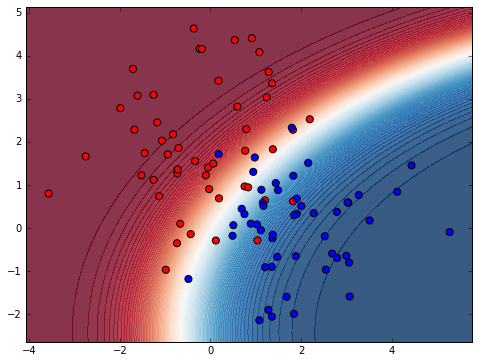

In [37]:
model = naive_bayes.GaussianNB() # non ha parametri che permettono la model selection
model.fit(X, y)

plot_decision_boundary(model, X)
# plot the dataset points
scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, s=50)

In [38]:
model.sigma_

array([[ 1.47297066,  1.91368116],
       [ 1.23043957,  1.07700299]])

In [41]:
model.theta_

array([[-0.20231251,  1.93620711],
       [ 1.88375835,  0.03554518]])

## Decition Trees

**Decision Trees (DTs)** are a set of supervised learning models used
for `classification <tree_classification>` and `regression`.
The goal is to create a model that predicts the value of a
target variable by learning simple decision rules inferred from the data
features.

Some advantages of decision trees are:

    - Simple to understand and to interpret. Trees can be visualised.

    - Requires little data preparation. Other techniques often require data
      normalisation, dummy variables need to be created and blank values to
      be removed. Note however that this module does not support missing
      values.

    - The cost of using the tree (i.e., predicting data) is logarithmic in the
      number of data points used to train the tree.

    - Able to handle both numerical and categorical data. Other techniques
      are usually specialised in analysing datasets that have only one type
      of variable. See :ref:`algorithms <tree_algorithms>` for more
      information.

    - Able to handle multi-output problems.

    - Uses a white box model. If a given situation is observable in a model,
      the explanation for the condition is easily explained by boolean logic.
      By contrast, in a black box model (e.g., in an artificial neural
      network), results may be more difficult to interpret.

    - Possible to validate a model using statistical tests. That makes it
      possible to account for the reliability of the model.

    - Performs well even if its assumptions are somewhat violated by
      the true model from which the data were generated.


The disadvantages of decision trees include:

    - Decision-tree learners can create over-complex trees that do not
      generalise the data well. This is called overfitting. Mechanisms
      such as pruning (not currently supported), setting the minimum
      number of samples required at a leaf node or setting the maximum
      depth of the tree are necessary to avoid this problem.

    - Decision trees can be unstable because small variations in the
      data might result in a completely different tree being generated.
      This problem is mitigated by using decision trees within an
      ensemble.

    - The problem of learning an optimal decision tree is known to be
      NP-complete under several aspects of optimality and even for simple
      concepts. Consequently, practical decision-tree learning algorithms
      are based on heuristic algorithms such as the greedy algorithm where
      locally optimal decisions are made at each node. Such algorithms
      cannot guarantee to return the globally optimal decision tree.  This
      can be mitigated by training multiple trees in an ensemble learner,
      where the features and samples are randomly sampled with replacement.

    - There are concepts that are hard to learn because decision trees
      do not express them easily, such as XOR, parity or multiplexer problems.

    - Decision tree learners create biased trees if some classes dominate.
      It is therefore recommended to balance the dataset prior to fitting
      with the decision tree.

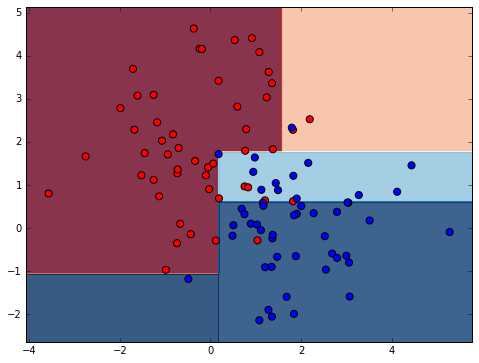

In [50]:
from sklearn import tree

# Inserire il massimo numerodi features da considerare e' una limitazione
# Qualsiasi aliitazione e' un'azione equivalente alla regolarizzazione
# Anche in questo caso non disponibile tramite parameti di tree.DecisionTreeClassifier()

model = tree.DecisionTreeClassifier(max_depth = 3, criterion = 'entropy') # variare i parametri
# per natura, l'albero overfitta sempre --> e' meglio limitare usando i parametri
model.fit(X, y)

plot_decision_boundary(model, X)
# plot the dataset points
scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, s=50)

Best Max Depth {'max_depth': 3}


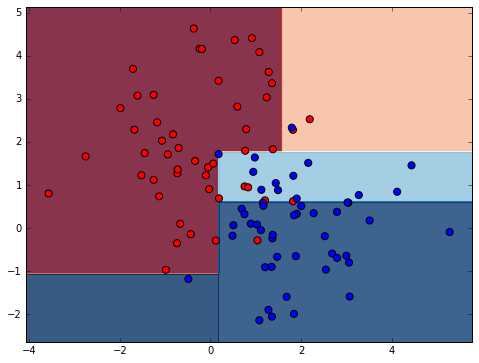

In [57]:
model = tree.DecisionTreeClassifier(criterion = 'entropy') 

max_depth = [1,2,3,4,5]
gs = grid_search.GridSearchCV(model, {'max_depth':max_depth}, cv = 10)
gs.fit (X,y)

print "Best Max Depth", gs.best_params_

model.fit(X, y)

plot_decision_boundary(gs, X)
# plot the dataset points
scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, s=50)

## Support Vector Machines

**Support vector machines (SVMs)** are a set of supervised learning
models used mainly for `classification`, but it can be used also for `regression`.

The advantages of support vector machines are:

    - Effective in high dimensional spaces.

    - Still effective in cases where number of dimensions is greater
      than the number of samples.

    - Uses a subset of training points in the decision function (called
      support vectors), so it is also memory efficient.

    - Versatile: different `svm_kernels` can be
      specified for the decision function. Common kernels are
      provided, but it is also possible to specify custom kernels.

The disadvantages of support vector machines include:

    - If the number of features is much greater than the number of
      samples, the method is likely to give poor performances.

    - SVMs do not directly provide probability estimates, these are
      calculated using an expensive five-fold cross-validation.

A support vector machine constructs a hyper-plane or set of hyper-planes in a high or infinite dimensional space, which can be used for classification, regression or other tasks. Intuitively, a good separation is achieved by the hyper-plane that has the largest distance to the nearest training data points of any class (so-called functional margin), since in general the larger the margin the lower the generalization error of the classifier.

#For a linear SVM classifier, the parameter **C** controls the penalty of the error term for a soft-margin SVM classifier. Setting **C** to a high value means that the classifier will try to maximize the margin with a high penalty for misclassified points.

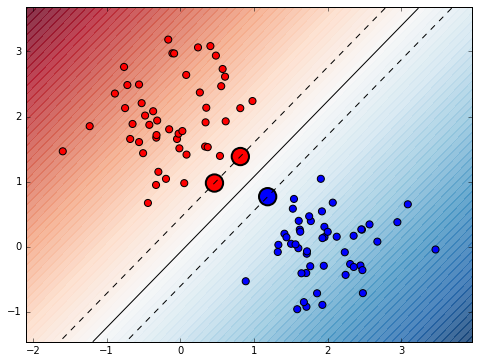

In [68]:
# Ridefiniamo il dataset con covarianza 0.3

np.random.seed(3)
nr_samples = 100

# Generate 100 samples from two bivariate Gaussian distributions
samples_red   = np.random.multivariate_normal(mean=(0,2), cov=np.identity(2)*0.3, size=nr_samples/2)
samples_green = np.random.multivariate_normal(mean=(2,0), cov=np.identity(2)*0.3, size=nr_samples/2)

# Join the red and green datasets as X and the class definitions as y
X = np.concatenate([samples_red, samples_green])
y = np.zeros(nr_samples, dtype=int)
y[nr_samples/2:] = 1

###########################################

from sklearn import svm

model = svm.SVC(kernel='linear', C=10.)
model.fit(X, y)

plot_decision_boundary(model, X, plot_hyperplanes=True)

# plot the dataset points
scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, s=50)

# plot the support vectors
SV = model.support_vectors_
scatter(SV[:, 0], SV[:, 1], c=y[model.support_],
        cmap=cm_bright, s=300, marker='o', facecolors='none', linewidths=2.);

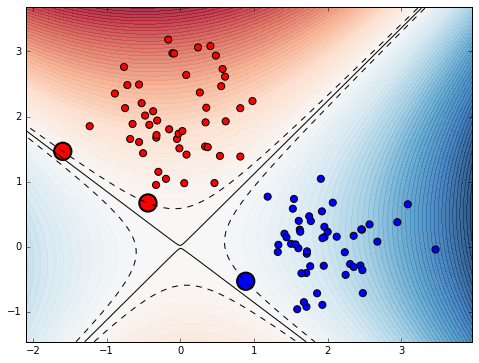

In [79]:
model = svm.SVC(kernel='poly', degree=2, C=100.) # C  penalizzazione per scorretta attribuzione. Insieme al grado
# del polinomio serve a controllare la stima

model.fit(X, y)

plot_decision_boundary(model, X, plot_hyperplanes=True)

# plot the dataset points
scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, s=50)

# plot the support vectors
SV = model.support_vectors_
scatter(SV[:, 0], SV[:, 1], c=y[model.support_],
        cmap=cm_bright, s=300, marker='o', facecolors='none', linewidths=2.);

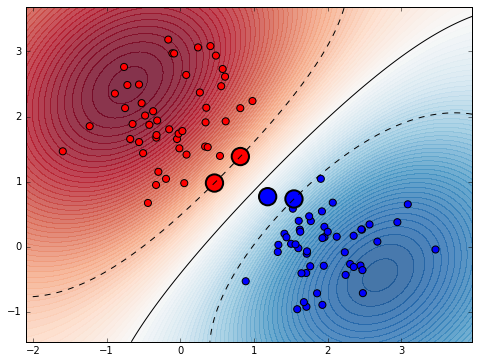

In [97]:
model = svm.SVC(kernel='rbf', gamma=1e-1, C=10) # Gamma piccolo --> gaussiane simil unif
model.fit(X, y)

plot_decision_boundary(model, X, plot_hyperplanes=True)

# plot the dataset points
scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, s=50)

# plot the support vectors
SV = model.support_vectors_
scatter(SV[:, 0], SV[:, 1], c=y[model.support_],
        cmap=cm_bright, s=300, marker='o', facecolors='none', linewidths=2.);

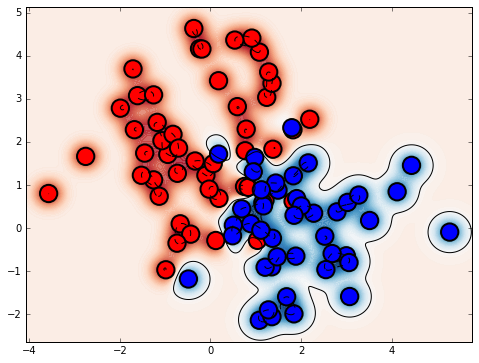

In [104]:
# Ridefiniamo il dataset con covarianza 0.3

np.random.seed(3)
nr_samples = 100

# Generate 100 samples from two bivariate Gaussian distributions
samples_red   = np.random.multivariate_normal(mean=(0,2), cov=np.identity(2)*1.5, size=nr_samples/2)
samples_green = np.random.multivariate_normal(mean=(2,0), cov=np.identity(2)*1.5, size=nr_samples/2)

# Join the red and green datasets as X and the class definitions as y
X = np.concatenate([samples_red, samples_green])
y = np.zeros(nr_samples, dtype=int)
y[nr_samples/2:] = 1

########################################### 


model = svm.SVC(kernel='rbf', gamma=10., C=1.)
model.fit(X, y)

plot_decision_boundary(model, X, plot_hyperplanes=True)

# plot the dataset points
scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, s=50)

# plot the support vectors
SV = model.support_vectors_
scatter(SV[:, 0], SV[:, 1], c=y[model.support_],cmap=cm_bright, s=300, marker='o', facecolors='none', linewidths=2.);

{'C': 0.01, 'gamma': 0.0001}


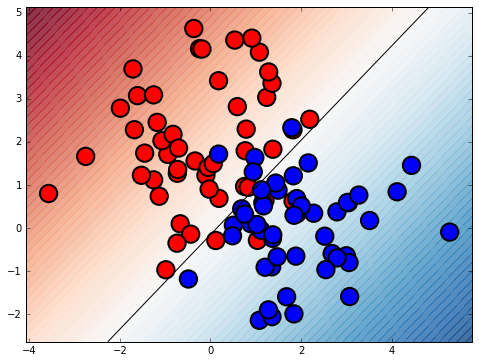

In [109]:
# Ridefiniamo il dataset con covarianza 0.3

np.random.seed(3)
nr_samples = 100

# Generate 100 samples from two bivariate Gaussian distributions
samples_red   = np.random.multivariate_normal(mean=(0,2), cov=np.identity(2)*1.5, size=nr_samples/2)
samples_green = np.random.multivariate_normal(mean=(2,0), cov=np.identity(2)*1.5, size=nr_samples/2)

# Join the red and green datasets as X and the class definitions as y
X = np.concatenate([samples_red, samples_green])
y = np.zeros(nr_samples, dtype=int)
y[nr_samples/2:] = 1

########################################### 


model = svm.SVC(kernel='rbf', gamma=1e-1, C=10) # Gamma piccolo --> gaussiane simil unif

gamma = np.logspace(-4, 0, 10)
C = np.logspace(-2,2, 10)
gs = grid_search.GridSearchCV(model, {'gamma':gamma, 'C':C}, cv = 10)
gs.fit (X,y)

print gs.best_params_

plot_decision_boundary(gs, X, plot_hyperplanes=True)

# plot the dataset points
scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, s=50)

# plot the support vectors
SV = gs.best_estimator_.support_vectors_
scatter(SV[:, 0], SV[:, 1], c=y[gs.best_estimator_.support_],
        cmap=cm_bright, s=300, marker='o', facecolors='none', linewidths=2.);

In [110]:
SV.shape

(100, 2)

## Ensemble Methods: Random Forests

The goal of **ensemble methods** is to combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability / robustness over a single estimator.

In **random forests**, each tree in the ensemble is built from a sample drawn with replacement (i.e., a bootstrap sample) from the training set. In addition, when splitting a node during the construction of the tree, the split that is chosen is no longer the best split among all features. Instead, the split that is picked is the best split among a random subset of the features. As a result of this randomness, **the bias of the forest usually slightly increases** (with respect to the bias of a single non-random tree) but, due to averaging, **its variance also decreases**, usually more than compensating for the increase in bias, hence yielding an overall better model.

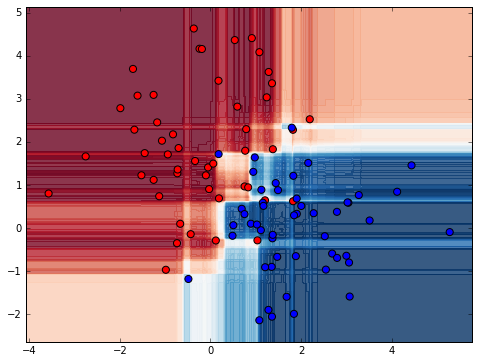

In [61]:
from sklearn import ensemble
# al crecsre del numero degli estimator, cresce l'accuratezza
model = ensemble.RandomForestClassifier(n_estimators=1000, random_state=0)
model.fit(X, y)

plot_decision_boundary(model, X)

# plot the dataset points
scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, s=50)

In [67]:
t = model.estimators_[0]
t.feature_importances_
t.tree_

# Exercise

Find the best model to classify the digits dataset.

Use a 10-fold cross-validation for the model selection phase.

In [111]:
from sklearn import datasets

digits = datasets.load_digits()

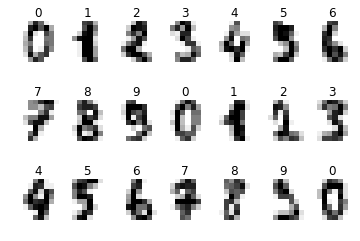

In [112]:
# plot the first 21 samples
for index, (image, label) in enumerate(zip(digits.images, digits.target)[:21]):
    plt.subplot(3, 7, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('%i' % label)

In [116]:
X = digits.data
y = digits.target

In [134]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y,test_size = 0.3) #restituisce test, training set e test, training target

In [135]:
X_train.shape

(1257, 64)

In [136]:
X_test.shape

(540, 64)

In [117]:
X.shape # 8x8 pixel (che definiscono nero bianco) diventano 64 valori in riga, 1797 immagini nel dataset

(1797, 64)

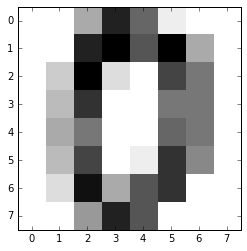

In [119]:
plt.imshow(X[0].reshape(8,8),cmap=plt.cm.gray_r, interpolation='nearest')

In [137]:
model = svm.SVC(kernel='rbf', gamma=1e-1)

gs = grid_search.GridSearchCV(model, {'gamma': np.logspace(-4, 0, 10)}, cv = 10)
gs.fit (X_train,y_train)

print gs.best_params_, gs.best_score_

{'gamma': 0.00077426368268112698} 0.991249005569


In [139]:
y_train

array([1, 9, 7, ..., 9, 1, 9])

In [140]:
y_pred = gs.predict(X_test)

In [141]:
metrics.accuracy_score(y_test, y_pred) # usare il test per valutare il predict

0.98888888888888893

In [142]:
metrics.confusion_matrix(y_test, y_pred) 
# un 5 e' stato classificato come 9 e un 9 e' stato classficiato come un 3 ecc

array([[60,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 61,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 51,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 43,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 47,  0,  0,  0,  0,  3],
       [ 0,  0,  0,  0,  0, 70,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 57,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 54,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 43,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 48]])

In [149]:
X_test[np.where(y_test != y_pred)].shape

(6, 64)

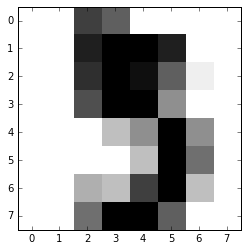

In [159]:
image = X_test[np.where(y_test != y_pred)][1].reshape(8,8)
plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')